<a href="https://colab.research.google.com/github/TheTonyZhou/JSC270-A4/blob/main/Assignment_4_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JSC270 Assignment 4


## Part I


### Importing Data

In [64]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np

In [65]:
train_url = 'https://raw.githubusercontent.com/TheTonyZhou/JSC270-A4/main/covid-tweets-train.csv'
train_data = pd.read_csv(train_url)
test_url = 'https://raw.githubusercontent.com/TheTonyZhou/JSC270-A4/main/covid-tweets-test.csv'
test_data = pd.read_csv(test_url)

In [66]:
train_data

,Unnamed: 0,OriginalTweet,Sentiment
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,1,advice Talk to your neighbours family to excha...,2
2,2,Coronavirus Australia: Woolworths to give elde...,2
3,3,My food stock is not the only one which is emp...,2
4,4,"Me, ready to go at supermarket during the #COV...",0
...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1
41151,41151,Response to complaint not provided citing COVI...,0
41152,41152,You know itÂs getting tough when @KameronWild...,2
41153,41153,Is it wrong that the smell of hand sanitizer i...,1


In [67]:
test_data

,Unnamed: 0,OriginalTweet,Sentiment
0,0,TRENDING: New Yorkers encounter empty supermar...,0
1,1,When I couldn't find hand sanitizer at Fred Me...,2
2,2,Find out how you can protect yourself and love...,2
3,3,#Panic buying hits #NewYork City as anxious sh...,0
4,4,#toiletpaper #dunnypaper #coronavirus #coronav...,1
...,...,...,...
3793,3793,Meanwhile In A Supermarket in Israel -- People...,2
3794,3794,Did you panic buy a lot of non-perishable item...,0
3795,3795,Asst Prof of Economics @cconces was on @NBCPhi...,1
3796,3796,Gov need to do somethings instead of biar je r...,0


In [68]:
print(train_data.shape)
print(test_data.shape)

(41155, 3)
(3798, 3)


In [69]:
## detecting wrong data
train_data.Sentiment.value_counts()

2            18042
0            15397
1             7712
 PA"             1
 England"        1
Name: Sentiment, dtype: int64

In [70]:
## removing inproper values in the train data
train_data = train_data[(train_data.Sentiment == '0') | (train_data.Sentiment == '1') | (train_data.Sentiment == '2')]

In [71]:
## No missing value in 'OriginalTweet' column.
train_data.OriginalTweet.isna().sum()

0

### A

In [72]:
negative_count = len(train_data[(train_data.Sentiment == '0')])
neutral_count = len(train_data[(train_data.Sentiment == '1')])
positive_count = len(train_data[(train_data.Sentiment == '2')])

print(negative_count)
print(neutral_count)
print(positive_count)

15397
7712
18042


In [73]:
negative_count = len(train_data[(train_data.Sentiment == '0')])
neutral_count = len(train_data[(train_data.Sentiment == '1')])
positive_count = len(train_data[(train_data.Sentiment == '2')])
total = negative_count + neutral_count + positive_count
positive_proportion = positive_count / total
negative_proportion = negative_count / total
neutral_proportion = neutral_count / total

print("positive proportion: {}".format(positive_proportion))
print("negative proportion: {}".format(negative_proportion))
print("neutral proportion: {}".format(neutral_proportion))

positive proportion: 0.4384340599256397
negative proportion: 0.37415858666861074
neutral proportion: 0.18740735340574954


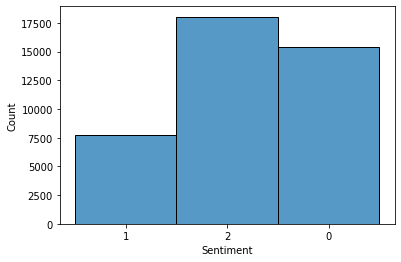

In [74]:
sns.histplot(data=train_data, x='Sentiment')

###B

In [75]:
# Create a new column in our DF that contains token lists instead of raw text
train_data['tokens'] = train_data['OriginalTweet'].str.split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
train_data

,Unnamed: 0,OriginalTweet,Sentiment,tokens
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t...."
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t..."
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia:, Woolworths, to, give..."
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi..."
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me,, ready, to, go, at, supermarket, during, ..."
...,...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1,"[Airline, pilots, offering, to, stock, superma..."
41151,41151,Response to complaint not provided citing COVI...,0,"[Response, to, complaint, not, provided, citin..."
41152,41152,You know itÂs getting tough when @KameronWild...,2,"[You, know, itÂs, getting, tough, when, @Kame..."
41153,41153,Is it wrong that the smell of hand sanitizer i...,1,"[Is, it, wrong, that, the, smell, of, hand, sa..."


###C

In [77]:
pattern = 'http'
for row in train_data['tokens']:
  for item in row:
      new_item = re.match(pattern, item)
      if new_item is not None:
        row.remove(item)

train_data.head(5)

,Unnamed: 0,OriginalTweet,Sentiment,tokens
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, and, and]"
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t..."
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia:, Woolworths, to, give..."
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi..."
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me,, ready, to, go, at, supermarket, during, ..."


###D

In [78]:
new_tokens = []

for row in train_data['tokens']:
  new_row = []
  for item in row:
    new_item = item.lower()
    new_item = re.sub('[^a-z0-9]*', '', new_item)
    new_row.append(new_item)
  new_tokens.append(new_row)

train_data['aphanumeric_token'] = new_tokens
train_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,OriginalTweet,Sentiment,tokens,aphanumeric_token
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, and, and]","[menyrbie, philgahan, chrisitv, and, and]"
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advice, talk, to, your, neighbours, family, t..."
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia:, Woolworths, to, give...","[coronavirus, australia, woolworths, to, give,..."
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, only, one, whi..."
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me,, ready, to, go, at, supermarket, during, ...","[me, ready, to, go, at, supermarket, during, t..."
...,...,...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1,"[Airline, pilots, offering, to, stock, superma...","[airline, pilots, offering, to, stock, superma..."
41151,41151,Response to complaint not provided citing COVI...,0,"[Response, to, complaint, not, provided, citin...","[response, to, complaint, not, provided, citin..."
41152,41152,You know itÂs getting tough when @KameronWild...,2,"[You, know, itÂs, getting, tough, when, @Kame...","[you, know, its, getting, tough, when, kameron..."
41153,41153,Is it wrong that the smell of hand sanitizer i...,1,"[Is, it, wrong, that, the, smell, of, hand, sa...","[is, it, wrong, that, the, smell, of, hand, sa..."


###E

In [79]:
#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []


for row in train_data['aphanumeric_token']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

train_data['stemmed_tokens'] = stemmed_tokens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


###F

In [95]:
nltk.download('stopwords')
sw = stopwords.words('english')[:100]

new_tokens = []
for row in train_data['stemmed_tokens']:
  new_row = []
  for item in row:
    if item not in sw and item != '':
      new_row.append(item)
  new_tokens.append(new_row)

train_data['tokens_no_sw'] = new_tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [96]:
train_data

,Unnamed: 0,OriginalTweet,Sentiment,tokens,aphanumeric_token,stemmed_tokens,tokens_no_sw
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, and, and]","[menyrbie, philgahan, chrisitv, and, and]","[menyrbi, philgahan, chrisitv, and, and]","[menyrbi, philgahan, chrisitv]"
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advice, talk, to, your, neighbours, family, t...","[advic, talk, to, your, neighbour, famili, to,...","[advic, talk, neighbour, famili, exchang, phon..."
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia:, Woolworths, to, give...","[coronavirus, australia, woolworths, to, give,...","[coronaviru, australia, woolworth, to, give, e...","[coronaviru, australia, woolworth, give, elder..."
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, onli, one, whi...","[food, stock, not, onli, one, empti, pleas, do..."
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me,, ready, to, go, at, supermarket, during, ...","[me, ready, to, go, at, supermarket, during, t...","[me, readi, to, go, at, supermarket, dure, the...","[readi, go, supermarket, dure, covid19, outbre..."
...,...,...,...,...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1,"[Airline, pilots, offering, to, stock, superma...","[airline, pilots, offering, to, stock, superma...","[airlin, pilot, offer, to, stock, supermarket,...","[airlin, pilot, offer, stock, supermarket, she..."
41151,41151,Response to complaint not provided citing COVI...,0,"[Response, to, complaint, not, provided, citin...","[response, to, complaint, not, provided, citin...","[respons, to, complaint, not, provid, cite, co...","[respons, complaint, not, provid, cite, covid1..."
41152,41152,You know itÂs getting tough when @KameronWild...,2,"[You, know, itÂs, getting, tough, when, @Kame...","[you, know, its, getting, tough, when, kameron...","[you, know, it, get, tough, when, kameronwild,...","[know, get, tough, when, kameronwild, ration, ..."
41153,41153,Is it wrong that the smell of hand sanitizer i...,1,"[Is, it, wrong, that, the, smell, of, hand, sa...","[is, it, wrong, that, the, smell, of, hand, sa...","[is, it, wrong, that, the, smell, of, hand, sa...","[wrong, smell, hand, sanit, start, turn, coron..."


###G

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
X, y = train_data['tokens_no_sw'].to_numpy(), train_data['Sentiment'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

counts = count_vec.fit_transform(X)
print(counts.toarray())

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'advic': 72, 'talk': 1747, 'neighbour': 1175, 'famili': 683, 'phone': 1295, 'number': 1202, 'creat': 456, 'contact': 399, 'list': 1039, 'school': 1528, 'employ': 603, 'set': 1562, 'onlin': 1224, 'shop': 1579, 'account': 56, 'suppli': 1720, 'regular': 1443, 'not': 1196, 'order': 1234, 'coronaviru': 419, 'australia': 171, 'woolworth': 1968, 'give': 788, 'elderli': 597, 'disabl': 527, 'dedic': 499, 'hour': 891, 'amid': 111, 'covid19': 446, 'outbreak': 1239, 'food': 736, 'stock': 1683, 'onli': 1223, 'one': 1221, 'empti': 605, 'pleas': 1315, 'dont': 553, 'panic': 1255, 'there': 1771, 'will': 1954, 'enough': 612, 'everyon': 637, 'take': 1743, 'more': 1140, 'than': 1767, 'need': 1171, 'stay': 1670, 'calm': 279, 'safe': 1505, 'readi': 1416, 'go': 793, 'supermarket': 1719, 'dure': 572, 'becaus': 204, 'im': 915, 'seriou': 1557, 'thing': 1775, 'caus': 306, 'shortag': 1582, 'sta

2000

### test data preprocessing

In [100]:
test_data['tokens'] = test_data['OriginalTweet'].str.split()
pattern = 'https://'
for row in test_data['tokens']:
  for item in row:
      new_item = re.match(pattern, item)
      if new_item is not None:
        row.remove(item)

new_tokens = []

for row in test_data['tokens']:
  new_row = []
  for item in row:
    new_item = item.lower()
    new_item = re.sub('[^a-z0-9]*', '', new_item)
    new_row.append(new_item)
  new_tokens.append(new_row)

test_data['aphanumeric_token'] = new_tokens

#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []


for row in test_data['aphanumeric_token']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

test_data['stemmed_tokens'] = stemmed_tokens


nltk.download('stopwords')
sw = stopwords.words('english')[:100]

new_tokens = []
for row in test_data['stemmed_tokens']:
  new_row = []
  for item in row:
    if item not in sw and item != '':
      new_row.append(item)
  new_tokens.append(new_row)

test_data['tokens_no_sw'] = new_tokens

X, y = test_data['tokens_no_sw'].to_numpy(), test_data['Sentiment'].to_numpy()

test_count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

test_counts = count_vec.fit_transform(X)
print(counts.toarray())

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
{'trend': 1822, 'new': 1167, 'empti': 598, 'supermarket': 1715, 'shelv': 1578, 'pictur': 1298, 'wegman': 1925, 'brooklyn': 259, 'onlin': 1219, 'grocer': 798, 'shopper': 1587, 'stock': 1687, 'when': 1937, 'couldnt': 430, 'find': 697, 'hand': 822, 'sanit': 1520, 'turn': 1836, 'amazon': 102, '2': 16, 'pack': 1244, 'how': 879, 'coronaviru': 410, 'concern': 383, 'drive': 560, 'price': 1358, 'can': 281, 'protect': 1377, 'love': 1044, 'one': 1216, 'panic': 1252, 'buy': 272, 'hit': 859, 'newyork': 1169, 'citi': 338, 'anxiou': 123, 'suppli': 1716, 'healthcar': 838, 'worker': 1963, '30': 28, 'becom': 197, '1st': 15, 'confirm': 388, 'patient': 1270, 'stage': 1665, 'event': 619, 'cdc': 303, 'toiletpap': 1789, 'coronavirusaustralia': 411, 'coronavirusupd': 422, 'c

2000

### H

In [120]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

X_train = counts.toarray()
y_train = train_data['Sentiment'].values.astype('int32')

nb = MultinomialNB(alpha=1)
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
X_test = test_counts.toarray()
y_test = test_data['Sentiment'].values.astype('int32')
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))

Test accuracy with simple Naive Bayes: 0.38730911005792523


In [103]:
print('Training accuracy:', accuracy_score(y_train, nb.predict(X_train)))

Training accuracy: 0.7119632572719983


In [121]:
df = pd.DataFrame()
df['0'] = nb.feature_count_[0]
df['1'] = nb.feature_count_[1]
df['2'] = nb.feature_count_[2]

print("5 most probable words for 0:", [count_vec.get_feature_names_out()[i]
                                       for i in df['0'].nlargest(5).index], 
      "\n and counts:", [int(count) for count in df['0'].nlargest(5)])

print("5 most words for 1:", [count_vec.get_feature_names_out()[index] 
                              for index in df['1'].nlargest(5).index], 
      "\n and count:", [int(count) for count in df['1'].nlargest(5)])

print("5 most probable words for 2:", [count_vec.get_feature_names_out()[i] 
                                       for i in df['2'].nlargest(5).index], 
      "\n and count:", [int(count) for count in df['2'].nlargest(5)])

5 most probable words for 0: ['coronaviru', 'covid19', 'price', 'food', 'thi'] 
 and counts: [6716, 6090, 4344, 3637, 3211]
5 most words for 1: ['coronaviru', 'covid19', 'store', 'supermarket', 'price'] 
 and count: [3804, 3407, 1584, 1439, 1366]
5 most probable words for 2: ['coronaviru', 'covid19', 'store', 'thi', 'price'] 
 and count: [7492, 7388, 3906, 3786, 3334]


###J

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
X, y = train_data['tokens_no_sw'].to_numpy(), train_data['Sentiment'].to_numpy()

def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

count_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

counts = count_vec.fit_transform(X)
print(counts.toarray())

print(count_vec.vocabulary_)
len(count_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'advic': 72, 'talk': 1747, 'neighbour': 1175, 'famili': 683, 'phone': 1295, 'number': 1202, 'creat': 456, 'contact': 399, 'list': 1039, 'school': 1528, 'employ': 603, 'set': 1562, 'onlin': 1224, 'shop': 1579, 'account': 56, 'suppli': 1720, 'regular': 1443, 'not': 1196, 'order': 1234, 'coronaviru': 419, 'australia': 171, 'woolworth': 1968, 'give': 788, 'elderli': 597, 'disabl': 527, 'dedic': 499, 'hour': 891, 'amid': 111, 'covid19': 446, 'outbreak': 1239, 'food': 736, 'stock': 1683, 'onli': 1223, 'one': 1221, 'empti': 605, 'pleas': 1315, 'dont': 553, 'panic': 1255, 'there': 1771, 'will': 1954, 'enough': 612, 'everyon': 637, 'take': 1743, 'more': 1140, 'than': 1767, 'need': 1171, 'stay': 1670, 'calm': 279, 'safe': 1505, 'readi': 1416, 'go': 793, 'supermarket': 1719, 'dure': 572, 'becaus': 204, 'im': 915, 'seriou': 1557, 'thing': 1775

2000

In [128]:
X, y = test_data['tokens_no_sw'].to_numpy(), test_data['Sentiment'].to_numpy()

test_count_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

test_counts = count_vec.fit_transform(X)

In [129]:
X_train = counts.toarray()
y_train = train_data['Sentiment'].values.astype('int32')

nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
X_test = test_counts.toarray()
y_test = test_data['Sentiment'].values.astype('int32')
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))

print('Training accuracy:', accuracy_score(y_train, nb.predict(X_train)))


Test accuracy with simple Naive Bayes: 0.41047919957872564
Training accuracy: 0.6919637432869189


### K

In [132]:
## Part K

#### Make a copy of the existing dataframe ####
lemma_train_data = train_data.copy()
lemma_train_data = lemma_train_data.drop(columns=['stemmed_tokens', 'tokens_no_sw'])
lemma_train_data

#### Lemmatizing Words ####
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemma_tokens = []

for row in lemma_train_data['aphanumeric_token']:
  lemma_row = []
  for item in row:
    lemma_token = lemmatizer.lemmatize(item)
    lemma_row.append(lemma_token)
  lemma_tokens.append(lemma_row)

lemma_train_data['lemma_tokens'] = lemma_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
lemma_train_data

,Unnamed: 0,OriginalTweet,Sentiment,tokens,aphanumeric_token,lemma_tokens
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, and, and]","[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv, and, and]"
1,1,advice Talk to your neighbours family to excha...,2,"[advice, Talk, to, your, neighbours, family, t...","[advice, talk, to, your, neighbours, family, t...","[advice, talk, to, your, neighbour, family, to..."
2,2,Coronavirus Australia: Woolworths to give elde...,2,"[Coronavirus, Australia:, Woolworths, to, give...","[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworth, to, give, ..."
3,3,My food stock is not the only one which is emp...,2,"[My, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, only, one, whi...","[my, food, stock, is, not, the, only, one, whi..."
4,4,"Me, ready to go at supermarket during the #COV...",0,"[Me,, ready, to, go, at, supermarket, during, ...","[me, ready, to, go, at, supermarket, during, t...","[me, ready, to, go, at, supermarket, during, t..."
...,...,...,...,...,...,...
41150,41150,Airline pilots offering to stock supermarket s...,1,"[Airline, pilots, offering, to, stock, superma...","[airline, pilots, offering, to, stock, superma...","[airline, pilot, offering, to, stock, supermar..."
41151,41151,Response to complaint not provided citing COVI...,0,"[Response, to, complaint, not, provided, citin...","[response, to, complaint, not, provided, citin...","[response, to, complaint, not, provided, citin..."
41152,41152,You know itÂs getting tough when @KameronWild...,2,"[You, know, itÂs, getting, tough, when, @Kame...","[you, know, its, getting, tough, when, kameron...","[you, know, it, getting, tough, when, kameronw..."
41153,41153,Is it wrong that the smell of hand sanitizer i...,1,"[Is, it, wrong, that, the, smell, of, hand, sa...","[is, it, wrong, that, the, smell, of, hand, sa...","[is, it, wrong, that, the, smell, of, hand, sa..."


In [133]:
# print the top 75 most popular english words
nltk.download('stopwords')
sw = stopwords.words('english')[:100]

new_tokens = []
for row in lemma_train_data['lemma_tokens']:
  new_row = []
  for item in row:
    if item not in sw and item != '':
      new_row.append(item)
  new_tokens.append(new_row)

lemma_train_data['lemma_tokens_no_sw'] = new_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lemma_train_data

In [134]:
X, y = lemma_train_data['lemma_tokens_no_sw'].to_numpy(), lemma_train_data['Sentiment'].to_numpy()

lemma_tfidf_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

lemma_tfidf = lemma_tfidf_vec.fit_transform(X)
print(lemma_tfidf.toarray())

print(lemma_tfidf_vec.vocabulary_)
len(lemma_tfidf_vec.vocabulary_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'advice': 68, 'talk': 1738, 'neighbour': 1156, 'family': 660, 'phone': 1280, 'number': 1185, 'create': 444, 'contact': 388, 'list': 1009, 'school': 1528, 'employer': 591, 'set': 1562, 'online': 1206, 'shopping': 1584, 'account': 49, 'supply': 1713, 'regular': 1437, 'not': 1178, 'order': 1219, 'coronavirus': 408, 'australia': 162, 'woolworth': 1964, 'give': 759, 'elderly': 585, 'disabled': 515, 'dedicated': 489, 'hour': 866, 'amid': 109, 'covid19': 436, 'outbreak': 1226, 'food': 709, 'stock': 1679, 'only': 1208, 'one': 1204, 'empty': 592, 'please': 1300, 'dont': 542, 'panic': 1241, 'there': 1765, 'will': 1951, 'enough': 598, 'everyone': 621, 'take': 1733, 'more': 1119, 'than': 1759, 'need': 1151, 'stay': 1667, 'calm': 263, 'safe': 1500, 'ready': 1411, 'go': 765, 'supermarket': 1711, 'im': 889, 'serious': 1557, 'thing': 1768, 'cause'

2000

In [135]:
## Test data for lemmatization

# Copy the test df
lemma_test_data = test_data.copy()

lemma_test_data['tokens'] = lemma_test_data['OriginalTweet'].str.split()
pattern = 'https://'
for row in lemma_test_data['tokens']:
  for item in row:
      new_item = re.match(pattern, item)
      if new_item is not None:
        row.remove(item)

new_tokens = []

for row in lemma_test_data['tokens']:
  new_row = []
  for item in row:
    new_item = item.lower()
    new_item = re.sub('[^a-z0-9]*', '', new_item)
    new_row.append(new_item)
  new_tokens.append(new_row)

lemma_test_data['aphanumeric_token'] = new_tokens




lemmatizer = WordNetLemmatizer()

lemma_tokens = []

for row in lemma_test_data['aphanumeric_token']:
  lemma_row = []
  for item in row:
    lemma_token = lemmatizer.lemmatize(item)
    lemma_row.append(lemma_token)
  lemma_tokens.append(lemma_row)

lemma_test_data['lemma_tokens'] = lemma_tokens



# print the top 75 most popular english words
nltk.download('stopwords')
sw = stopwords.words('english')[:100]

new_tokens = []
for row in lemma_test_data['stemmed_tokens']:
  new_row = []
  for item in row:
    if item not in sw:
      new_row.append(item)
  new_tokens.append(new_row)

lemma_test_data['tokens_no_sw'] = new_tokens

X, y = lemma_test_data['tokens_no_sw'].to_numpy(), lemma_test_data['Sentiment'].to_numpy()

lemma_tfidf_test_vec = TfidfVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None,
    max_features = 2000)

lemma_tfidf_test = lemma_tfidf_test_vec.fit_transform(X)
print(lemma_tfidf_test.toarray())

print(lemma_tfidf_test_vec.vocabulary_)
len(lemma_tfidf_test_vec.vocabulary_)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21888581 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.14085384 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
{'trend': 1825, 'new': 1174, 'empti': 607, 'supermarket': 1717, 'shelv': 1582, 'pictur': 1306, 'wegman': 1926, 'brooklyn': 261, 'onlin': 1227, 'grocer': 805, 'shopper': 1591, 'stock': 1689, 'when': 1938, 'couldnt': 435, 'find': 705, 'hand': 829, 'sanit': 1524, 'turn': 1839, 'amazon': 105, '2': 17, 'pack': 1252, 'how': 885, 'coronaviru': 415, 'concern': 387, 'drive': 569, 'price': 1366, 'can': 285, 'protect': 1383, 'love': 1052, 'one'

2000

In [136]:
X_train = lemma_tfidf.toarray()
y_train = lemma_train_data['Sentiment'].values.astype('int32')
# Let's fit the Naive Bayes model to our training data
nb = MultinomialNB()
# Fit model to training data
nb.fit(X_train, y_train)
# Predict on test data
X_test = lemma_tfidf_test.toarray()
y_test = lemma_test_data['Sentiment'].values.astype('int32')
y_preds = nb.predict(X_test)

print('Test accuracy with simple Naive Bayes:',accuracy_score(y_test,y_preds))
# We get a very good accuracy, despite class imbalance (recall 87% were Ham)
print('Training accuracy:', accuracy_score(y_train, nb.predict(X_train)))


## How does the accuracy with lemmatization compare to the accuracy with stemming? 

Test accuracy with simple Naive Bayes: 0.4120589784096893
Training accuracy: 0.6889018492867731
